In [12]:
# @title Plot the sample agent data against the baselines.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import collections
current_palette = sns.color_palette()
sns.palplot(current_palette)
import pandas as pd
import numpy as np

In [95]:

def plot_results_game(experimental_data, title, game, agent_names, num_steps_per_iteration, savefig=False, legend_loc="lower right",BASE_PATH='/mnt/research/linkaixi/AllData/rewardshaping/'):

#     experimental_data['iteration'] = experimental_data['iteration'].apply(lambda x: x*num_steps_per_iteration)
    fig, ax = plt.subplots(figsize=(15,10))
#     ax.ticklabel_format(style='sci')
    sns.tsplot(data=experimental_data, time='iteration', unit='run_number',
             condition='agent', value='train_episode_reward', ax=ax, ci=95)
    fontsize = 25
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')

    yaxis_label, xaxis_label = "Returns", "Steps ({})".format(int(num_steps_per_iteration))
    fontsize = "30"
    title_axis_font = {'size': fontsize, 'weight': 'bold'}
    xylabel_axis_font = {'size': fontsize, 'weight': 'bold'}
    ax.set_ylabel(yaxis_label, **xylabel_axis_font)
    ax.set_xlabel(xaxis_label, **xylabel_axis_font)
    ax.set_title(title, **xylabel_axis_font)
    legend_properties = {'weight':'bold','size':"22"}
    ax.legend(loc=legend_loc, prop=legend_properties)
    ax.legend(loc=legend_loc, prop=legend_properties)

    # plt.show()
    if savefig:
        figname = BASE_PATH + "{}_iclr.pdf".format(title.replace(" ", ""))
        plt.savefig(figname)
        plt.show()
        plt.close()
    else:
        plt.show()
    return experimental_data



In [24]:
# def read_logs(base_path, game, agent_name):



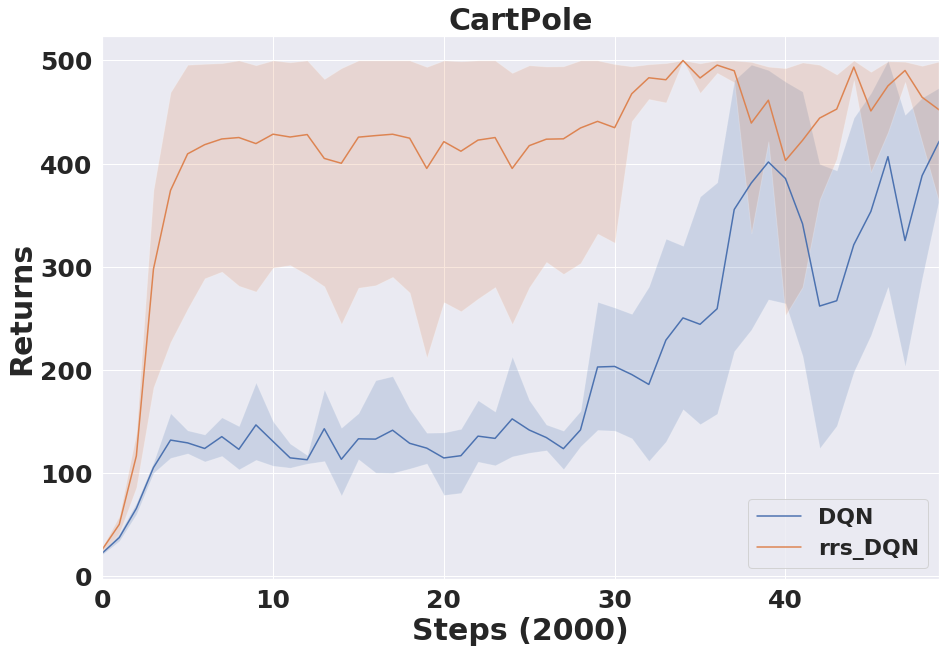

In [96]:

def read_log(game, agent_name, log_path, num_steps_per_iteration, num_iter):
    results = []
    for seed in range(1, 6):
        csv_file = log_path + "{}/{}/{}/monitor.csv".format(agent_name, game, seed)
        df = pd.read_csv(csv_file, header=1).dropna()
        df.loc[:, 'l'] = df.loc[:, 'l'].cumsum()
        eprewmean = np.array(df.loc[:, 'r'].tolist())
        eplen = np.array(df.loc[:, 'l'].tolist())

        # construct arary
        raw_data_ = {}
        for i in range(num_iter):
            results_per_iter = []
            step_begin = int(i * num_steps_per_iteration)
            step_end = int((i+1) * num_steps_per_iteration)
            eprew_iter = eprewmean[(eplen>step_begin) & (eplen <=step_end)]
            results_per_iter.append(agent_name)
            results_per_iter.append(game)
            results_per_iter.append(i)  #iteration
            results_per_iter.append(np.mean(eprew_iter))  # train episode reward 
            results_per_iter.append(seed)  # run number
            results.append(results_per_iter)
    experimental_data = pd.DataFrame.from_records(results,  columns=["agent", "game", "iteration", "train_episode_reward", "run_number"])
    return experimental_data

game = "CartPole"
agent_names = ["DQN", "rrs_DQN"]
log_path = '/mnt/research/linkaixi/AllData/rewardshaping/'
experimental_datas = []
num_steps_per_iteration = 2e+3
num_iter = 50
for agent_name in agent_names:
    experimental_data = read_log(game, agent_name, log_path, num_steps_per_iteration, num_iter)
    experimental_datas.append(experimental_data)

all_agents_data = pd.concat(experimental_datas, axis=0)
savefig = True
experimental_datas = plot_results_game(all_agents_data, title, game, agent_names, num_steps_per_iteration, savefig)


,agent,game,iteration,train_episode_reward,run_number
0,DQN,CartPole,0,21.543478,1
1,DQN,CartPole,1,35.357143,1
2,DQN,CartPole,2,71.714286,1
3,DQN,CartPole,3,112.611111,1
4,DQN,CartPole,4,181.909091,1
5,DQN,CartPole,5,152.461538,1
6,DQN,CartPole,6,125.875000,1
7,DQN,CartPole,7,120.062500,1
8,DQN,CartPole,8,129.750000,1
9,DQN,CartPole,9,149.153846,1


In [59]:
 "Steps ()".format(num_steps_per_iteration)

'Steps ()'

In [94]:
"Steps ({})".format(int(num_steps_per_iteration))

'Steps (2000)'